# **JGR-Atmosphere 2021**


This script is an example file showing how to import atmospheric river data (semi-raw) from Github used in the paper: ***When will humanity notice its influence on atmospheric rivers? ***. One should notice that due to the storage limitation of Github and policy of GFDL, all files are saved with a post-process form (i.e., AR). We also provide the high temporal-resolution IVT data from one ensemble member. If you are interested in the raw data for detecting ARs (e.g., u, v and q), please contact corresponding author **Kai-Chih Tseng**: kaichiht@princeton.edu


Code instruction:

1.  Please copy this script to your googledrive (or local machine) before using it
2.  ram for analyzing this data can't be less than 25GB
3.  Storage can't be less than 300GB (e.g., can run on Google Colab pro)



## Step 1: Setup environment

In [ ]:
# environment setup
!pip install netcdf4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from netCDF4 import Dataset as NetCDFFile
import random 
import timeit
import pickle
from scipy import stats
!pip install wget
import wget
import os 
!pip install Cdo
from cdo import Cdo

## Step 2: retrieve seasonal AR data from remote repository




In [ ]:
data_list = wget.download('https://raw.githubusercontent.com/kuiper2000/AR_LE/master/list_update.txt')
from google.colab import files
!ls
#!rm *.txt
#!rm *.npz

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

AR_DJF = np.zeros((30,178,360,576))  # dim = ensemble member, year (from 1921), lat, lon #unit= AR day/day 


count  = 0
for i in open('list_update.txt'):
    list1               = i.split("/")
    downloaded          = drive.CreateFile({'id':list1[5].strip()})   
    downloaded.GetContentFile('FIG1_ens'+str(count+1).zfill(2)+'.npz')
    data                = np.load('/content/FIG1_ens'+str(count+1).zfill(2)+'.npz') 
    AR_DJF[count,:,:,:] = data['ar_monthly_DJF']     # historical+SSP58.5 data
    #AR_DJF[count,:,:,:] = data['ar_monthly_DJF_45'] # historical+SSP54.5 data
    del data
    count=count+1


## Step 3: Load high-temporal resolution IVT data (a single member)
Each data is split into nine parts and has a length of 10yr and daily temporal resolution (with overall 90yr for each simulation). If you successfully load the files from remote repository, they will show up in your temporal file directory. 

hint: if you run out of memory during downloading the data, you can use the link in https://raw.githubusercontent.com/kuiper2000/AR_LE/master/list_IVT.txt to access the data directly. 

In [ ]:
!rm *.txt
!rm *.nc
data_list = wget.download('https://raw.githubusercontent.com/kuiper2000/AR_LE/master/list_IVT.txt')
for i in open('list_IVT.txt'):
    wget.download(i)


## Step 4: Some simple visualizations

Text(0.5, 1.0, 'AR freqnecy for Jan 1921')

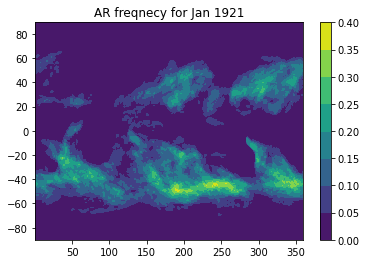

In [ ]:
lon   = np.arange(0.3125,360,0.625)
lat   = np.arange(-90,90,0.5)
xx,yy = np.meshgrid(lon,lat)

plt.figure()
cs=plt.contourf(xx,yy,AR_DJF[0,0,:,:])         # dim = ensemble member, year (from 1921), lat, lon #unit= AR day/day
plt.colorbar(cs)
plt.title('AR freqnecy for Jan 1921')